In [1]:
import numpy as np # 线性代数
import pandas as pd # 数据处理，CSV文件I/O（如pd.read_csv）

#可视化
import matplotlib.pyplot as plt

#机器学习
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

#系统
import os
print(os.listdir("../input"))

['olivetti_faces_target.npy', 'olivetti_faces.npy']


In [2]:
# 警告过滤器用于控制警告消息的行为，如忽略，显示或转换为错误（引发异常）。 
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


<a class="anchor" id="1."></a>**1. 概括** 

在这项研究中，人脸识别是使用 Olivetti 数据集中的人脸图像进行的。人脸识别的步骤如下：
* 人脸图像的主要成分是通过 PCA 获得的。
* 确定足够数量的主成分
* 根据两种不同的分类模型，得到准确率分数。
* 根据两种不同的分类模型，得到交叉验证准确率得分。
* 已对最佳模型进行参数优化。

<a class="anchor" id="1e."></a>**2.人脸识别**

Bledsoe 在 1964 年至 1966 年期间对自动面部识别系统进行了首次研究。这项研究是半自动的。人脸上的特征点是手动确定的，并放在名为 RAND 的表中。然后，计算机将通过对这些点进行分类来执行识别过程。然而，Kanade 在 1977 年完成了功能齐全的面部识别应用程序。研究中提出了一种基于特征的方法。在此日期之后，二维 (2D) 人脸识别得到深入研究。 2000 年代后开始进行三维 (3D) 面部研究。

3D 面部识别方法的开发方式与 2D 面部识别方法不同。因此，在讨论人脸识别方法时，将其分为 2D 和 3D 会更准确。

我们可以将二维方法进行的人脸识别研究分为三类；分析（基于特征，局部），全局（外观）和混合方法。虽然分析方法希望通过比较面部组件的属性来识别，但全局方法试图通过从所有面部派生的数据来实现识别。混合方法，连同局部和全局方法，试图获得更准确地表达面部的数据。

在此内核中执行的人脸识别可以在全球人脸识别方法下进行评估。

在分析方法中，确定的特征点的距离和它们之间的角度，面部特征的形状或包含区域特征的变量是从面部图像中获得的，用于面部识别。分析方法根据图案和几何特性以两种不同的方式检查面部图像。在这些方法中，人脸图像由较小尺寸的数据表示，因此解决了增加人脸识别计算成本的大数据尺寸问题。

基于全局的方法被研究人员应用于人脸识别，因为它们在没有特征提取的情况下进行人脸识别，这在基于特征的方法中很麻烦。自 1990 年代以来，基于全局的方法已被用于人脸识别，因为它们显着提高了人脸识别效率。 Kirby 和 Sirovich (1990) 首先开发了一种称为特征脸的方法，用于基于主成分分析的面部表示和识别。使用这种方法，Turk 和 Pentland 将整个人脸图像转换为向量并使用一组样本计算特征脸。 PCA 能够利用从图像中获得的数据，以最佳水平获得表示面部的数据。同一个人的不同面部和光照水平被评估为PCA的弱点。

该内核中的人脸识别性能完全基于 Turk 和 Pentland 的工作。

<a class="anchor" id="2."></a>**3. Olivetti 数据集** 

Olivetti数据集简介：

* 面部图像拍摄于 1992 年 4 月至 1994 年 4 月之间。
* 40个不同的人各有十个不同的形象
* 数据集中有400张人脸图片
* 面部图像是在不同时间拍摄的，光线、面部表情和面部细节各不相同
* 所有面部图像均为黑色背景
* 图像为灰度级
* 每张图片的大小为 64x64
* 图像像素值被缩放到 [0, 1] 区间
* 40 个人的名字被编码为 0 到 39 之间的整数


In [3]:
data=np.load("../input/olivetti_faces.npy")
target=np.load("../input/olivetti_faces_target.npy")

我们来验证一下以上信息

In [4]:
#数据集中有 400 张图像
#数据集中有 40 个独特的目标
#每张图片的大小为 64x64
#像素值被缩放到 [0,1] 区间。例如：[0.30991736 0.3677686 0.41735536 0.44214877]
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [5]:
#唯一目标编号：[ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


<a class="anchor" id="2.1."></a>**3.1. 在 Olivetti 数据集中显示 40 个不同的人** 

In [6]:
def show_40_distinct_people(images, unique_ids):
    #以 18x9 图形大小创建 4X10 子图
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #遍历用户 ID
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    #数据集中有 40 个不同的人
    plt.suptitle("There are 40 distinct people in the dataset")

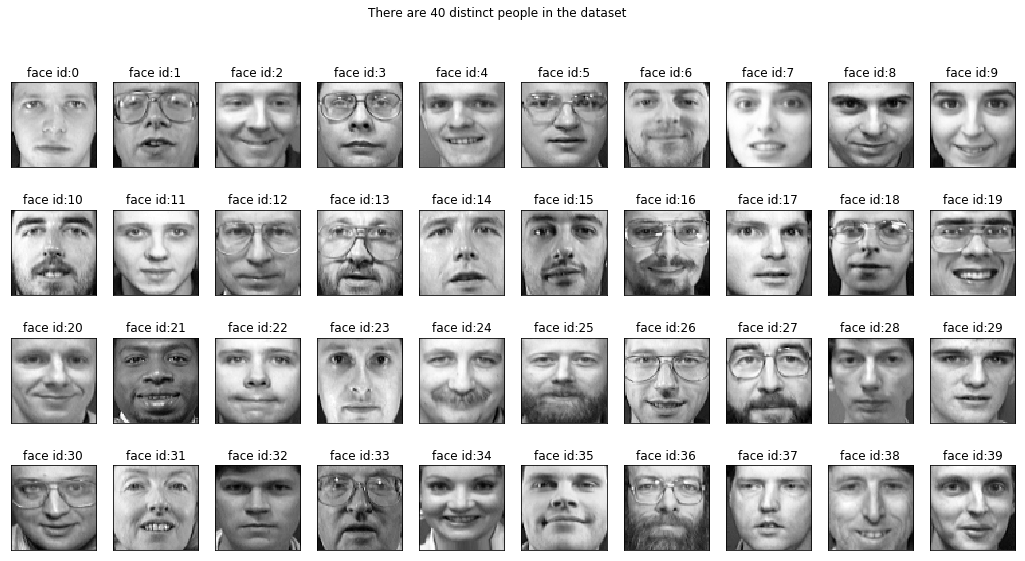

In [7]:
show_40_distinct_people(data, np.unique(target))

如上图所示，该数据集有 40 张不同的个人面部图像。

<a class="anchor" id="2.2.">

<a  class="anchor" id="2.2."></a>**3.2. 显示所选目标的 10 张面部图像** 

In [8]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# 每个受试者有 10 张不同的面部图像
    rows=(len(subject_ids)*10)/cols
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    

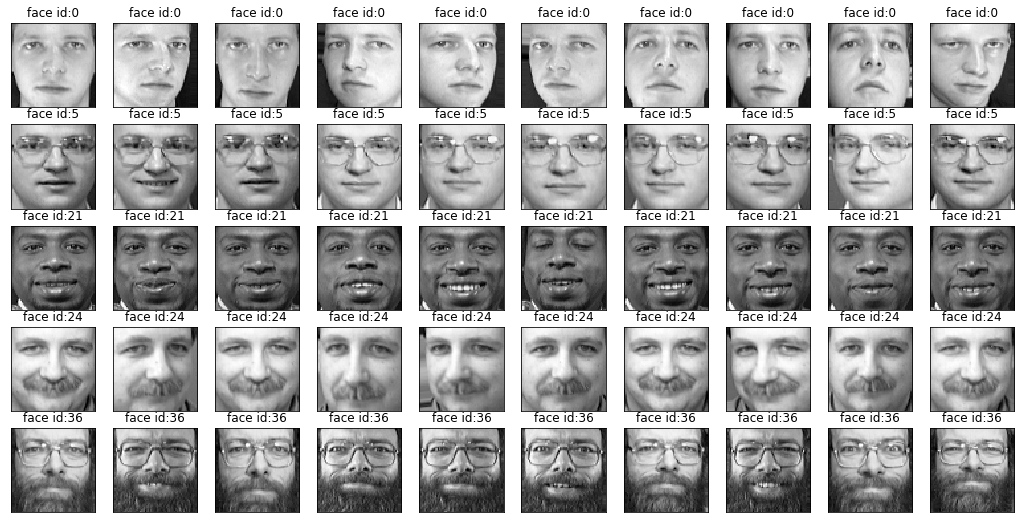

In [9]:
#可以玩 subject_ids 来查看其他人的面孔
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

在不同的光照、面部表情和面部细节（眼镜、胡须）的背景下，主体的每张脸都有不同的特征

<a class="anchor" id="3."></a>**4. 人脸识别机器学习模型**

机器学习模型可以处理向量。由于图像数据是矩阵形式，因此必须将其转换为向量。

In [10]:
#我们为机器学习模型重塑图像
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


<a class="anchor" id="3.1."></a>**4.1. 将数据和目标拆分为随机训练和测试子集** 

该数据集包含每个受试者的 10 张面部图像。在人脸图像中，70% 将用于训练，30% 用于测试。使用分层功能为每个主题提供相同数量的训练和测试图像。因此，每个主题将有 7 张训练图像和 3 张测试图像。

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


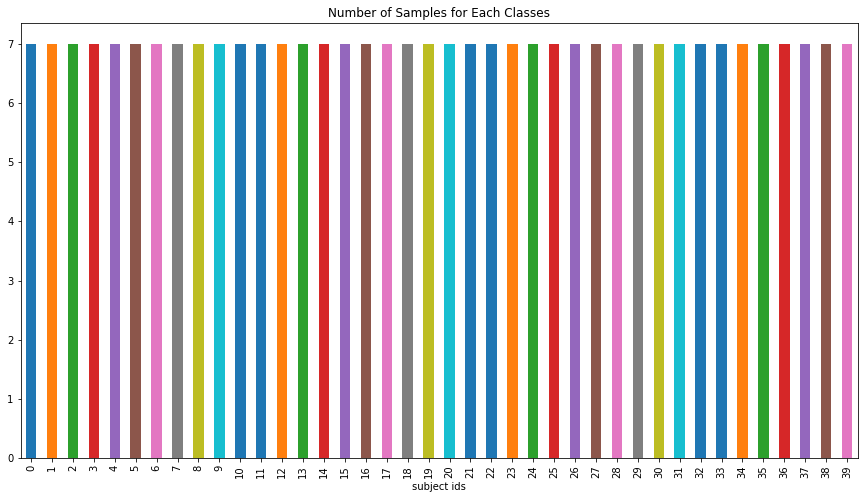

In [12]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
# 每个类别的样本数
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

<a class="anchor" id="3.3."></a>**4.2. 定义目标数量的 PCA 投影**

In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

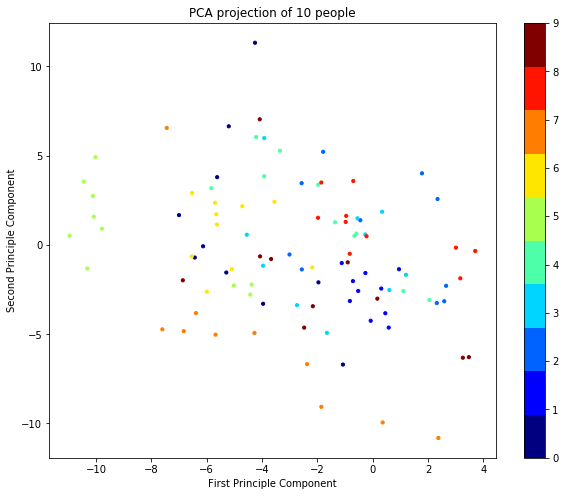

In [14]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

#第一主成分
ax.set_xlabel("First Principle Component")
#第二主成分
ax.set_ylabel("Second Principle Component")
#{} 人的 PCA 投影
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

<a class="anchor" id="3.4."></a>**4.3. 寻找主成分的最佳数量**

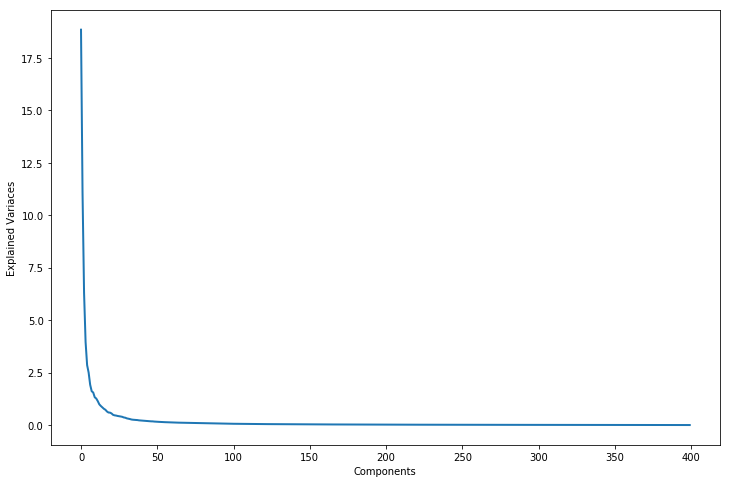

In [15]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)

#成分
plt.xlabel('Components')
#解释方差
plt.ylabel('Explained Variaces')
plt.show()

在上图中，可以看出90个以上的PCA分量代表同一个数据。现在让我们使用 90 个 PCA 组件进行分类过程。

In [16]:
n_components=90

In [17]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

<a class="anchor" id="3.5."></a>**4.4. 显示平均脸**  

Text(0.5,1,'Average Face')

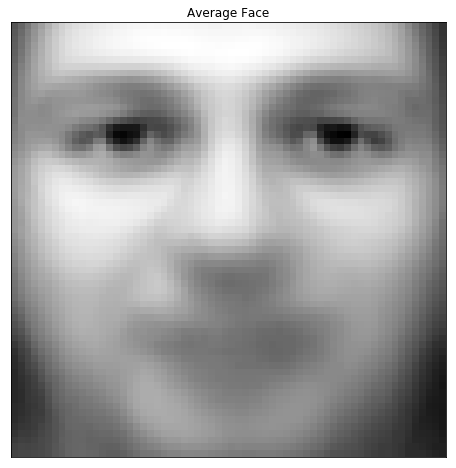

In [18]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

<a class="anchor" id="3.5e1."></a>**4.5. 显示特征面** 

Text(0.5,0.98,'All Eigen Faces')

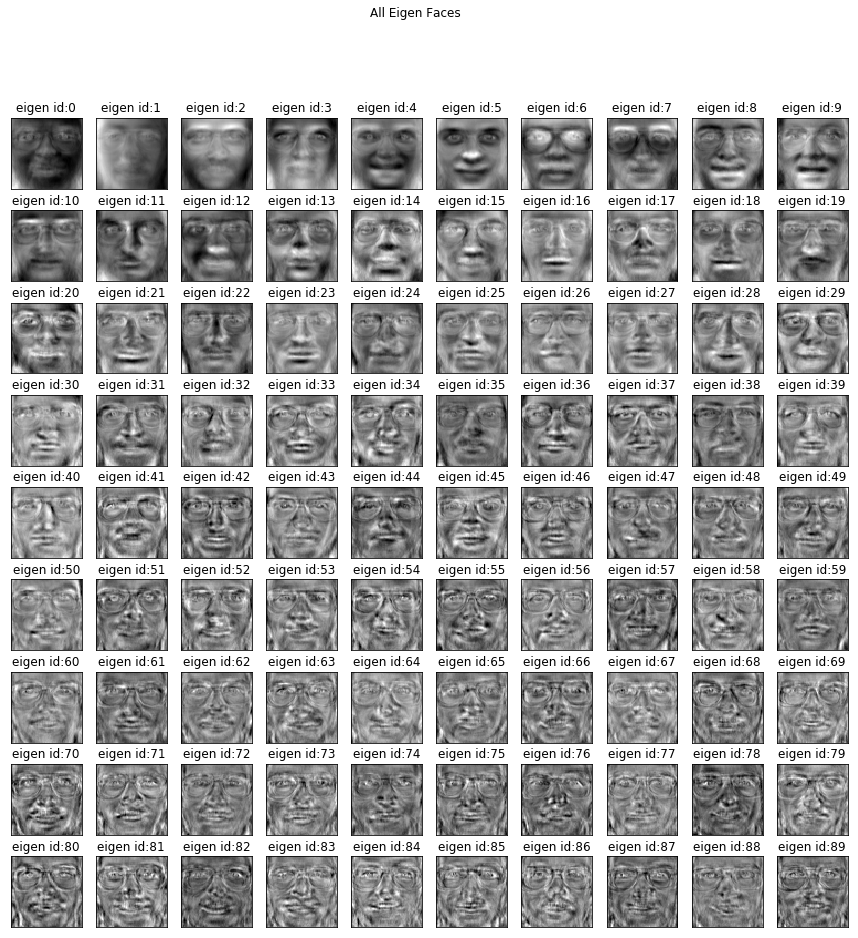

In [19]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    # 特征id
    axarr[i].set_title("eigen id:{}".format(i))
# 所有特征脸
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

<a class="anchor" id="3.6."></a>**4.6. 分类结果**  

In [20]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [21]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
#准确度
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.93


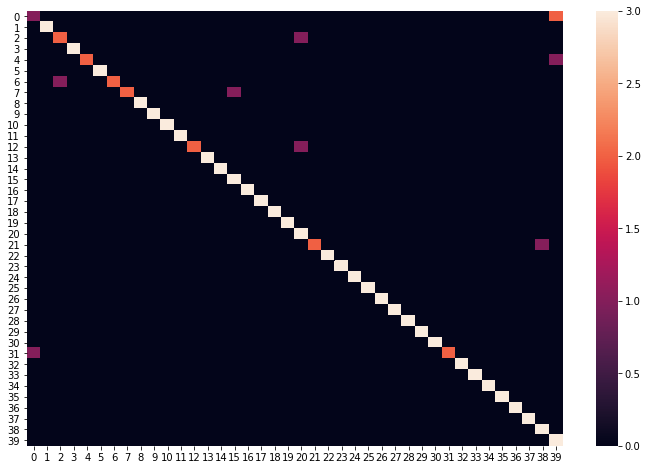

In [22]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [23]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00    

<a class="anchor" id="3.7."></a>**4.7. 更多结果** 

我们可以通过更多分类方法获得最优的机器学习模型的准确性结果。

In [24]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    #准确度
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.93

========== LR RESULT ==========
Accuracy score:0.93

========== NB RESULT ==========
Accuracy score:0.87

========== KNN RESULT ==========
Accuracy score:0.71

========== DT RESULT ==========
Accuracy score:0.63

========== SVM RESULT ==========
Accuracy score:0.93



根据以上结果，线性判别分析和逻辑回归似乎具有最好的性能。

<a class="anchor" id="3.8."></a>**4.8. 验证结果**  

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    #平均交叉验证
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.98
LR mean cross validations score:0.94
NB mean cross validations score:0.77
KNN mean cross validations score:0.69
DT mean cross validations score:0.50
SVM mean cross validations score:0.87


根据交叉验证分数，线性判别分析和逻辑回归仍然具有最佳性能

In [26]:
lr=LinearDiscriminantAnalysis()
lr.fit(X_train_pca, y_train)
y_pred=lr.predict(X_test_pca)
#准确率
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy score:0.93


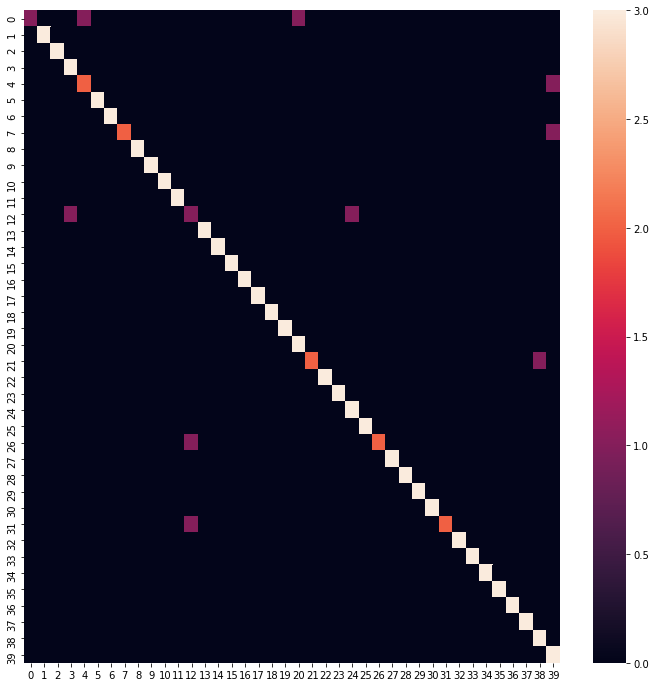

In [27]:
cm=metrics.confusion_matrix(y_test, y_pred)

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [28]:
#分类结果
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3
           4       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.33      0.33      0.33         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
   

<a class="anchor" id="3.9."></a>**4.9. 更多经过验证的结果：留一法交叉验证** 

Olivetti 数据集包含每个受试者的 10 张面部图像。这是用于训练和测试机器学习模型的一个小数字。有一种推荐的交叉验证方法可以更好地评估类示例很少的机器学习模型：Leave One Out 交叉验证。在 LOO 方法中，只有一个类的样本用于测试。其他用于训练。重复此过程，直到每个样品都用于测试。

In [29]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LogisticRegression()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
# 留一法交叉验证平均准确度
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LogisticRegression Leave One Out cross-validation mean accuracy score:0.96


In [30]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LinearDiscriminantAnalysis()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
# 留一法交叉验证平均准确度
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LinearDiscriminantAnalysis Leave One Out cross-validation mean accuracy score:0.98


<a class="anchor" id="3.10."></a>**4.10. 超参数调整：GridSearcCV** 

我们可以做 GridSearchCV 来提高模型的泛化性能。为此，我们将调整逻辑回归分类器的超参数。

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
from sklearn.model_selection import LeaveOneOut

#这个过程需要很长时间。您可以使用参数：{'C': 1.0, 'penalty': 'l2'} 
#网格搜索交叉验证分数：0.93
"""
params={'penalty':['l1', 'l2'],
                'C':np.logspace(0, 4, 10)
                }
clf=LogisticRegression()
#kfold=KFold(n_splits=3, shuffle=True, random_state=0)
loo_cv=LeaveOneOut()
gridSearchCV=GridSearchCV(clf, params, cv=loo_cv)
gridSearchCV.fit(X_train_pca, y_train)
print("Grid search fitted..")
print(gridSearchCV.best_params_)
print(gridSearchCV.best_score_)
print("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))
"""


'\nparams={\'penalty\':[\'l1\', \'l2\'],\n                \'C\':np.logspace(0, 4, 10)\n                }\nclf=LogisticRegression()\n#kfold=KFold(n_splits=3, shuffle=True, random_state=0)\nloo_cv=LeaveOneOut()\ngridSearchCV=GridSearchCV(clf, params, cv=loo_cv)\ngridSearchCV.fit(X_train_pca, y_train)\nprint("Grid search fitted..")\nprint(gridSearchCV.best_params_)\nprint(gridSearchCV.best_score_)\nprint("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))\n'

In [33]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_pca, y_train)
#lr得分
print("lr score:{:.2f}".format(lr.score(X_test_pca, y_test)))

lr score:0.93


<a class="anchor" id="3.11."></a>**4.11. 精确召回率 ROC 曲线** 

精确召回曲线用于二元分类。在 Olivetti 数据集中，有 40 个不同的类。但sklearn 可以让我们说明多标签设置中的精确召回

In [34]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

Target=label_binarize(target, classes=range(40))
print(Target.shape)
print(Target[0])

n_classes=Target.shape[1]

(400, 40)
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [35]:
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass=train_test_split(X, 
                                                                                              Target,
                                                                                             test_size=0.3,
                                                                                             stratify=Target,
                                                                                     random_state=0)

In [36]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train_multiclass)

X_train_multiclass_pca=pca.transform(X_train_multiclass)
X_test_multiclass_pca=pca.transform(X_test_multiclass)

In [37]:
oneRestClassifier=OneVsRestClassifier(lr)

oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score=oneRestClassifier.decision_function(X_test_multiclass_pca)

In [38]:
# 对于每个班级
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_multiclass[:, i],
                                                        y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_multiclass[:, i], y_score[:, i])

# “微平均”：联合量化所有班级的分数
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_multiclass.ravel(),
    y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_multiclass, y_score,
                                                     average="micro")
# 平均精度分数，所有类别的微平均
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.97


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.97')

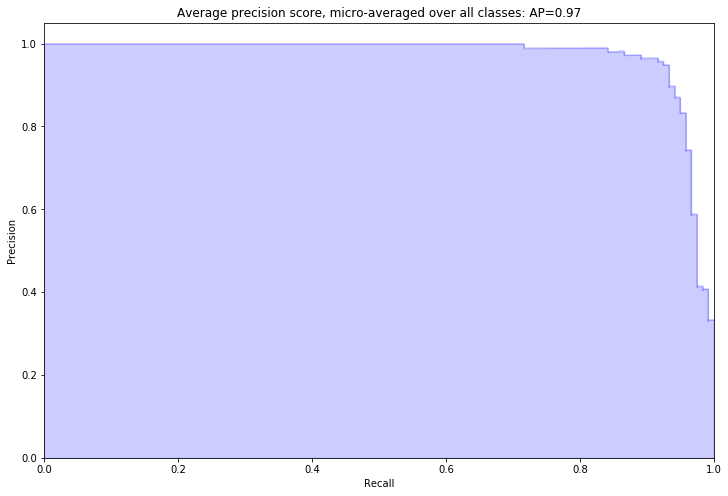

In [39]:
from sklearn.utils.fixes import signature

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(1, figsize=(12,8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',
                 **step_kwargs)

#召回数
plt.xlabel('Recall')
#精确度
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
#平均精度分数，所有类别的微平均
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

<a class="anchor" id="5."></a>**5. 线性判别分析 İle Boyut Azaltma** 

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [41]:
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit(X_train, y_train).transform(X_train)
X_test_lda=lda.transform(X_test)

In [42]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_lda,y_train)
y_pred=lr.predict(X_test_lda)

In [43]:
# 准确度
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
# 分类结果
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Accuracy score:0.94
Classification Results:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00    

<a class="anchor" id="6."></a>**6. 机器学习自动化工作流：Pipeline** 

机器学习在数据集上的应用有一个标准的工作流程。 Sklearn 提供了 Pipeline 对象来自动化这个工作流。Pipeline允许执行机器学习操作的标准工作流程，例如缩放、特征提取和建模。 Pipeline保证在整个数据集中进行相同的操作，保证训练和测试数据的一致性。

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
work_flows_std = list()
work_flows_std.append(('lda', LinearDiscriminantAnalysis(n_components=n_components)))
work_flows_std.append(('logReg', LogisticRegression(C=1.0, penalty="l2")))
model_std = Pipeline(work_flows_std)
model_std.fit(X_train, y_train)
y_pred=model_std.predict(X_test)

In [46]:
#准确度
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
#分类结果
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Accuracy score:0.94
Classification Results:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00    